In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
apr = pd.read_csv("/Users/jacopobinati/Desktop/HM2/listings_APR_FINAL2.csv")
oct = pd.read_csv("/Users/jacopobinati/Desktop/HM2/listings_OCT_FINAL2.csv")
apr.head()

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,...,d_Exercise_equipment_yoga_mat,d_stationary_bike,d_Bread_maker,d_Sun_loungers,d_EV_charger,d_Beach_access,d_and_dresser,d_Paid_parking_garage_on_premises,d_Free_driveway_parking_on_premises_u2013_1_space,d_Private_gym_in_building
0,3,NaN,NaN,False,True,False,Upper West Side,House,3,1 bath,...,0,0,0,0,0,0,0,0,0,0
1,5,NaN,NaN,False,True,True,Williamsburg,House,3,1 bath,...,0,0,0,0,0,0,0,0,0,0
2,7,NaN,NaN,False,True,True,Long Island City,House,4,1 bath,...,0,0,0,0,0,0,0,0,0,0
3,8,NaN,NaN,False,True,True,Fort Greene,House,2,1 bath,...,0,0,0,0,0,0,0,0,0,0
4,10,NaN,NaN,False,True,False,East Village,House,4,1 bath,...,0,0,0,0,0,0,0,0,0,0


In [3]:
oct.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,beds,...,d_Beach_access,d_Exercise_equipment_yoga_mat,d_Paid_parking_lot_off_premises,d_Bread_maker,d_EV_charger,d_stationary_bike,d_Pack_u2019n_play_Travel_crib___always_at_the_listing,d_Table_corner_guards,d_Bay_view,d_Free_driveway_parking_on_premises_u2013_1_space
0,NaN,NaN,False,True,True,Bedford-Stuyvesant,House,2,1 bath,1.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,100.0,True,True,True,Bedford-Stuyvesant,House,4,1 bath,2.0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,False,True,True,Kips Bay,House,2,1 bath,1.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0.0,False,True,False,Crown Heights,House,2,1 bath,2.0,...,0,0,0,0,0,0,0,0,0,0
4,100.0,99.0,False,True,True,Williamsburg,House,2,1 bath,1.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
apr_columns = set(apr.columns)
oct_columns = set(oct.columns)

# Columns present in both datasets
common_columns = apr_columns.intersection(oct_columns)
print("Variables present in both datasets:")
print(common_columns)

# Columns unique to each dataset
apr_only_columns = apr_columns.difference(oct_columns)
oct_only_columns = oct_columns.difference(apr_columns)

print("\nVariables unique to April dataset:")
print(apr_only_columns)

print("\nVariables unique to October dataset:")
print(oct_only_columns)

Variables present in both datasets:
{'d_Paid_parking_lot_off_premises', 'property_Private room', 'd_Carbon_monoxide_alarm', 'd_Drying_rack_for_clothing', 'n_review_scores_value', 'd_Indoor_fireplace', 'd_hair_dryer', 'd_Mosquito_net', 'd_Board_games', 'd_Beach_access', 'd_Paid_parking_off_premises', 'd_Childrenu2019s_dinnerware', 'n_bathroom', 'number_of_reviews_ltm', 'd_High_chair', 'd_Paid_dryer_u2013_In_building', 'd_Pool', 'd_Single_level_home', 'd_Hammock', 'd_Pets_allowed', 'flag_reviews_per_month', 'd_Roku', 'n_review_scores_checkin', 'd_Bikes', 'd_kitchen', 'd_Dryer_u2013_In_building', 'calculated_host_listings_count_shared_rooms', 'flag_review_scores_checkin', 'd_Hot_tub', 'd_body_wash', 'd_wifi', 'n_host_response_rate', 'n_maximum_nights', 'n_accommodates', 'd_Private_patio_or_balcony', 'd_Dining_table', 'd_Exercise_equipment_free_weights', 'd_Outdoor_dining_area', 'd_Elevator', 'd_Crib___available_upon_request', 'd_refrigerator', 'd_Bed_linens', 'd_Courtyard_view', 'd_Public

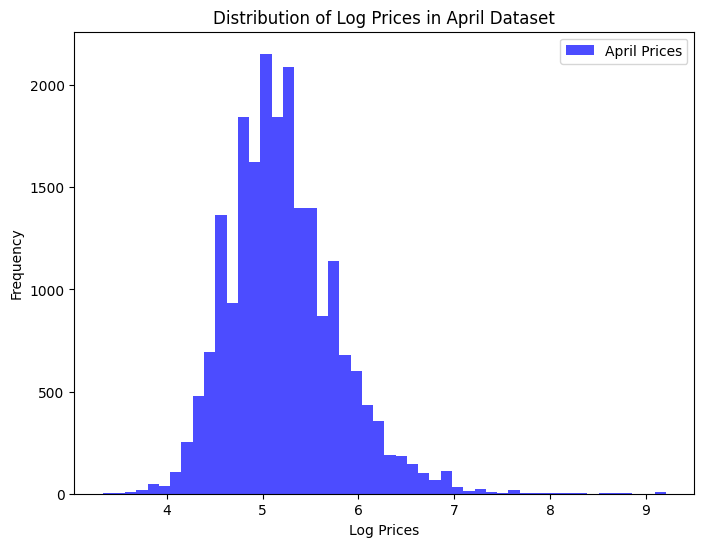

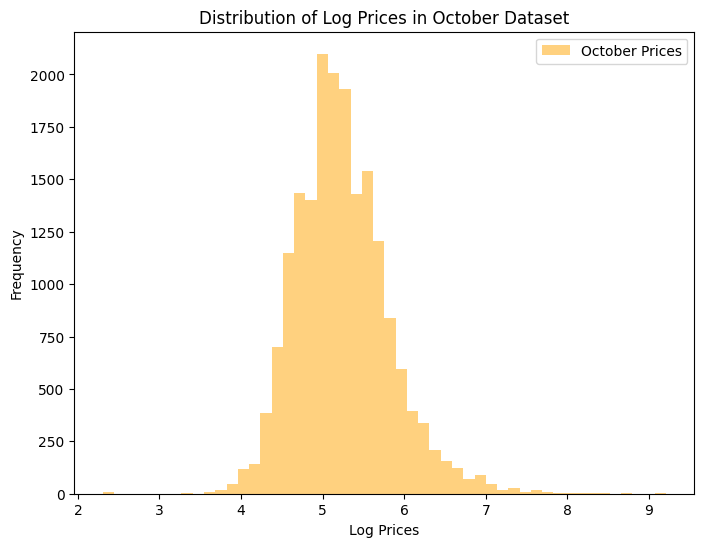

In [5]:
filtered_apr_ln_price = apr[apr['ln_price'] > 0]['ln_price']
filtered_oct_ln_price = oct[oct['ln_price'] > 0]['ln_price']

# Plotting the distribution of 'ln_price' variable for April dataset after filtering
plt.figure(figsize=(8, 6))
plt.hist(filtered_apr_ln_price, bins=50, alpha=0.7, color='blue', label='April Prices')
plt.title('Distribution of Log Prices in April Dataset')
plt.xlabel('Log Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the distribution of 'ln_price' variable for October dataset after filtering
plt.figure(figsize=(8, 6))
plt.hist(filtered_oct_ln_price, bins=50, alpha=0.5, color='orange', label='October Prices')
plt.title('Distribution of Log Prices in October Dataset')
plt.xlabel('Log Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


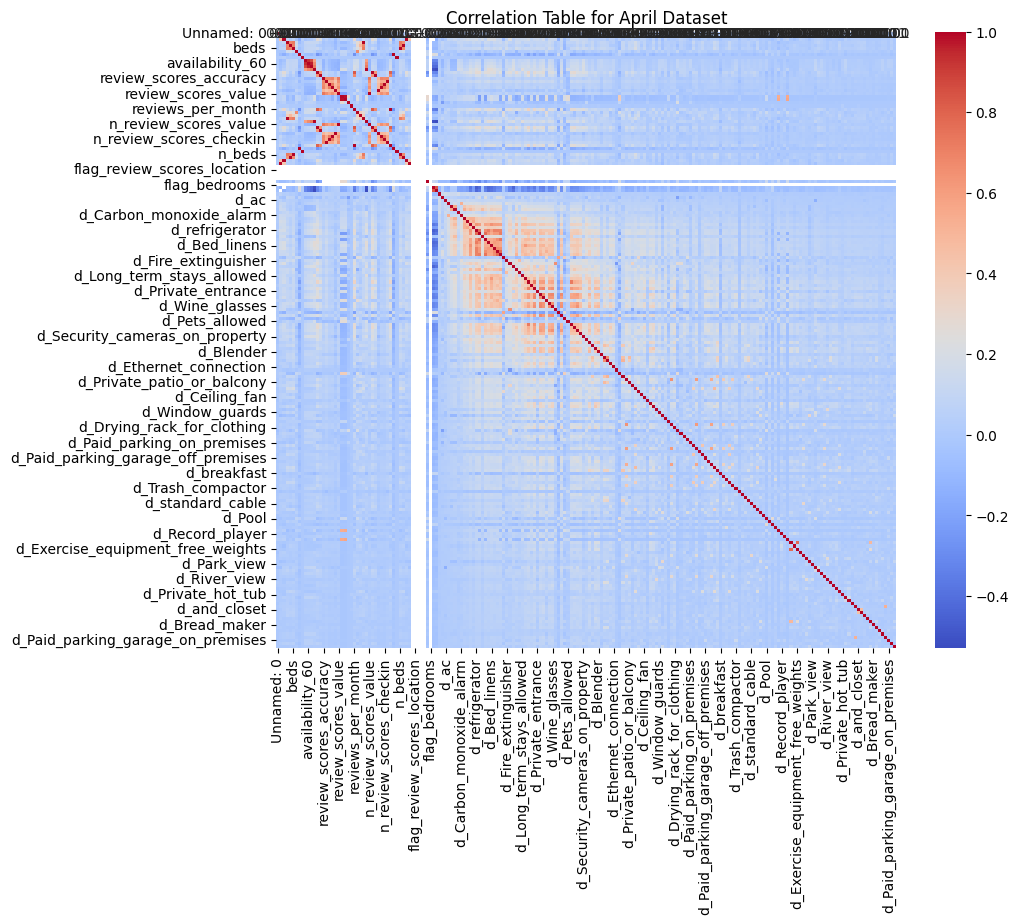

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


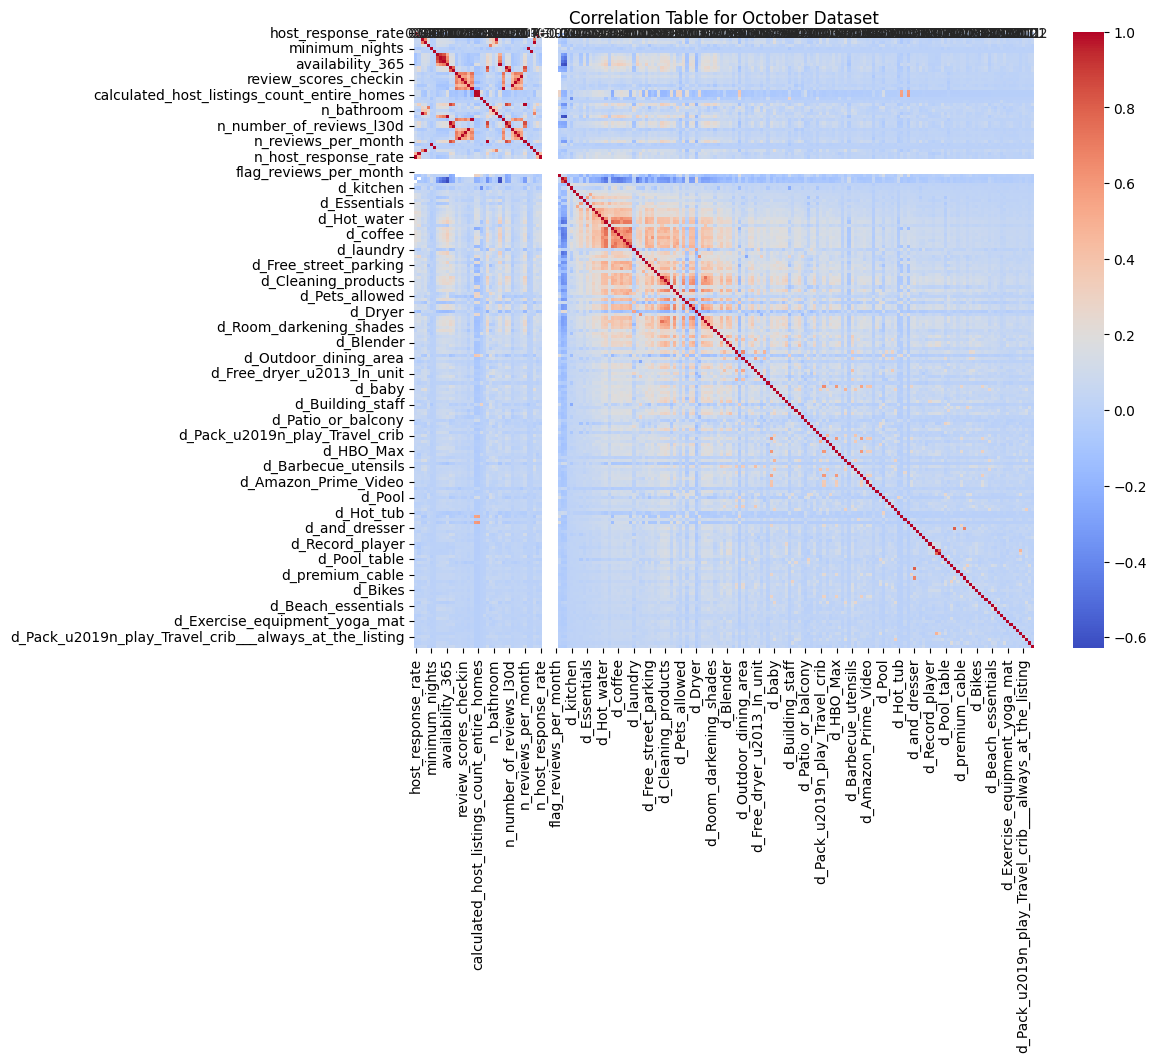

In [7]:
apr_numeric = apr.select_dtypes(include=['float64', 'int64'])
oct_numeric = oct.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrices for April and October datasets
apr_corr = apr_numeric.corr()
oct_corr = oct_numeric.corr()

# Plot correlation matrix for April dataset
plt.figure(figsize=(10, 8))
sns.heatmap(apr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Table for April Dataset')
plt.show()

# Plot correlation matrix for October dataset
plt.figure(figsize=(10, 8))
sns.heatmap(oct_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Table for October Dataset')
plt.show()


In [15]:
plt.figure(figsize=(8, 6))
plt.hist(apr['f_neighbourhood_group_cleansed'], bins=50, alpha=0.7, color='blue', label='Neighbourhood frequency')
plt.title('Distribution of Neighbourhoods in April Dataset')
plt.xlabel('Neighbourhoods')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(oct['f_neighbourhood_group_cleansed'], bins=50, alpha=0.7, color='blue', label='Neighbourhood frequency')
plt.title('Distribution of Neighbourhoods in April Dataset')
plt.xlabel('Neighbourhoods')
plt.ylabel('Frequency')
plt.legend()
plt.show()

KeyError: 'f_neighbourhood_group_cleansed'

<Figure size 800x600 with 0 Axes>